In [ ]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns

# get working directory
os.getcwd()

'/Users/emilyiliu/Documents/Graduate School&Jobs/UCLA/Research/code'

In [ ]:
## read in files

# test files
#emgality = pd.read_table("results/DB14042/DB14042_merged_neighborhood__assoc_table_.txt")
#cetuximab = pd.read_table("results/DB00002/DB00002_merged_neighborhood__assoc_table_.txt")
#nicotine = pd.read_table("results/DB00184/DB00184_merged_neighborhood__assoc_table_.txt")
#bortezomib = pd.read_table("results/DB00188/DB00188_merged_neighborhood__assoc_table_.txt")
#phentermine = pd.read_table("results/DB00191/DB00191_merged_neighborhood__assoc_table_.txt")

# antidepressant data
antidepress = pd.read_csv("21AntiDepressantData.csv")
antidepress.head()
#emgality.head()

,drug,db.id,efficacy.or,eff.ci.lb,eff.ci.ub,accept.or,acc.ci.lb,acc.ci.ub
0,agomelatine,DB06594,1.65,1.44,1.88,0.84,0.72,0.97
1,buproprion,DB01156,1.58,1.35,1.86,0.96,0.81,1.14
2,citalopram,DB00215,1.52,1.24,1.74,0.94,0.80,1.09
3,desvenlafaxine,DB06700,1.49,1.66,1.79,1.08,0.88,1.33
4,duloxetine,DB00476,1.85,1.50,2.07,1.09,0.96,1.23


In [ ]:
# function to get list of drug genes
def drug_genes(drug):

    # pull drug genes
    genes_string = list(drug.genes)

    # create list of drug genes
    genes_list = []
    for string in genes_string:
        newstring = string.split(',')
        genes_list.append(newstring)
    #return genes_list
    #print(genes_list)

    # create one list of genes
    genes_dup = []
    for sublist in genes_list:
        for gene in sublist:
            genes_dup.append(gene)
    #print(genes_dup)

    # list of unique genes
    genes_uniq = set(genes_dup)
    #print(genes_uniq)
    return genes_uniq

In [ ]:
# Gather all files for an analysis
results_dir = 'results/antidepressants'
files_to_analyze = []
unique_files = set()
drugs_to_files = {}
file_ext = '_merged_neighborhood__assoc_table_.txt'
for (dir_name, sub_dir, file_list) in os.walk(results_dir):
    #print(dir_name)
    #print(os.path.split(dir_name))
    drug_name = os.path.split(dir_name)[1]
    #print(drug_name)
    for file_name in file_list:
        if file_ext in file_name:
            #print(file_name)
            files_to_analyze.append(file_name)
            unique_files.add(file_name)
            drugs_to_files[drug_name] = file_name

In [ ]:
# a dictionary where keys are DBIDs and values are a set of network genes
drugs_to_netGenes = {}
for drug in drugs_to_files:
    file = 'results/antidepressants/' + drug + '/' + drugs_to_files[drug]
    tbl = pd.read_csv(file, sep = '\t')
    genes = drug_genes(tbl)
    drugs_to_netGenes[drug] = genes
#print(drugs_to_netGenes)

# a dictionary where keys are DBIDs and values are either from zebra fish screen or from clinical data
drugs_to_values = antidepress[['db.id', 'efficacy.or']].set_index('db.id').to_dict()['efficacy.or']
#drugs_to_values = {'DB00191': 1.65,
#                   'DB14042': 1.58,
#                   'DB00002': 1.49,
#                   'DB00184': 1.68,
#                   'DB00188': 1.89} # test files
#antidepress.columns
drugs_to_netGenes

{'DB00285': {'ABCB1',
  'ABCG2',
  'CYP2D6',
  'CYP3A4',
  'SLC6A2',
  'SLC6A3',
  'SLC6A4'},
 'DB00215': {'ABCB1',
  'ADRA1D',
  'AGT',
  'AVPR1A',
  'AVPR1B',
  'CASR',
  'CCK',
  'CCKBR',
  'CHRM1',
  'CHRM3',
  'CHRM5',
  'CYP1A2',
  'CYP2C19',
  'CYP2D6',
  'CYP3A4',
  'EDN1',
  'EDN2',
  'EDN3',
  'F2',
  'FFAR1',
  'FFAR2',
  'FFAR3',
  'GAST',
  'GCGR',
  'GHRL',
  'GHSR',
  'GNA11',
  'GNA14',
  'GNA15',
  'GNAQ',
  'GNB1',
  'GNRH1',
  'GNRHR',
  'GRM1',
  'GRM5',
  'GRP',
  'GRPR',
  'HCRT',
  'HRH1',
  'HTR2B',
  'KISS1',
  'KNG1',
  'LPAR6',
  'MLN',
  'NMB',
  'NMBR',
  'NMS',
  'NMU',
  'NMUR2',
  'NPFF',
  'NPS',
  'NPSR1',
  'NTS',
  'OPN4',
  'OXT',
  'P2RY1',
  'P2RY2',
  'P2RY6',
  'PROK1',
  'PROK2',
  'PROKR1',
  'PROKR2',
  'QRFP',
  'SLC6A4',
  'TAC1',
  'TAC3',
  'TRH',
  'TRHR',
  'UTS2',
  'UTS2B',
  'UTS2R'},
 'DB00472': {'ABCB1',
  'ADRA1B',
  'ADRA1D',
  'AGT',
  'ALB',
  'APOA1',
  'APOA2',
  'APOA4',
  'APOC1',
  'APOC2',
  'APOC3',
  'ATM',
  'AVPR1A',


In [ ]:
# create matrix to prep for linear regression measuring effect
all_rows = []
for (dbid, effect_size) in drugs_to_values.items():
    net_genes = drugs_to_netGenes[dbid]
    row_data = {'name':dbid, 'effect':effect_size}
    for g in net_genes:
        row_data[g]=1
    all_rows.append(row_data)

df = pd.DataFrame(all_rows)
efficacy = df.fillna(0)
efficacy

,name,effect,NPS,NPSR1,AVPR1B,GRP,GNRH2,CHRM1,GRM1,LPAR4,...,NTRK2,UGT1A4,DERL1,GPR132,NGF,SHC3,GSTP1,SLCO1B3,SLCO2B1,ABCB11
0,DB06594,1.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB01156,1.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00215,1.52,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB06700,1.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB00476,1.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DB01175,1.68,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DB00472,1.52,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,DB00176,1.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,DB08918,1.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,DB04896,1.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create matrix to prep for linear regression measuring acceptance
drugs_to_values = antidepress[['db.id', 'accept.or']].set_index('db.id').to_dict()['accept.or']

all_rows = []
for (dbid, effect_size) in drugs_to_values.items():
    net_genes = drugs_to_netGenes[dbid]
    row_data = {'name':dbid, 'accept':effect_size}
    for g in net_genes:
        row_data[g]=1
    all_rows.append(row_data)

df = pd.DataFrame(all_rows)
accept = df.fillna(0)
accept

,name,accept,NPS,NPSR1,AVPR1B,GRP,GNRH2,CHRM1,GRM1,LPAR4,...,NTRK2,UGT1A4,DERL1,GPR132,NGF,SHC3,GSTP1,SLCO1B3,SLCO2B1,ABCB11
0,DB06594,0.84,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB01156,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00215,0.94,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB06700,1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB00476,1.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DB01175,0.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DB00472,0.88,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,DB00176,1.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,DB08918,1.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,DB04896,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear regression model

In [ ]:
# import packages
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Efficacy

In [ ]:
## linear regression models (efficacy)

# set x and y variables
x_eff = efficacy[efficacy.columns[2:326]]
y_eff = efficacy['effect']

# linear regression model
lm = LinearRegression()
lm_mod = lm.fit(x_eff, y_eff)
eff_coef = lm_mod.coef_

# create data frame
eff_coef_full = pd.DataFrame({'gene': efficacy.columns[2:326],
                              'eff_coef_full': eff_coef}).sort_values(by = 'eff_coef_full', ascending = False)

# waterfall plot
#plt.bar(x = eff_coef_full.gene, height = eff_coef_full.eff_coef_full)
#plt.show()

# penalized linear regression model (ridge: penalizes close to zero)
ridge = Ridge(alpha = 0.1)
ridge_mod = ridge.fit(x_eff, y_eff)
eff_coef_ridge = ridge_mod.coef_

# create data frame
eff_ridge = pd.DataFrame({'gene': efficacy.columns[2:326],
                          'coef_ridge': eff_coef_ridge}).sort_values(by = 'coef_ridge', ascending = False)

# barplot
#plt.bar(x = eff_ridge.gene, height = eff_ridge.coef_ridge)
#plt.show()

## create combo data frame
eff_coef_df = pd.DataFrame({'gene': efficacy.columns[2:326],
              'eff_coef_full': eff_coef,
              'eff_coef_ridge': eff_coef_ridge})
eff_coef_df
#eff_coef_df.to_csv('results/efficacy_coef.csv')

,gene,eff_coef_full,eff_coef_ridge
0,NPS,-0.019530,-0.012451
1,NPSR1,-0.018000,-0.012451
2,AVPR1B,0.001327,-0.001672
3,GRP,-0.001846,-0.001672
4,GNRH2,0.007765,0.006994
...,...,...,...
319,SHC3,0.012265,0.012635
320,GSTP1,-0.031034,-0.029119
321,SLCO1B3,-0.000514,-0.000703
322,SLCO2B1,-0.000514,-0.000703


### Acceptability

In [ ]:
## linear regression models (acceptance)

# set x and y variables
x_acc = accept[accept.columns[2:326]]
y_acc = accept['accept']

# linear regression model
lm = LinearRegression()
lm_mod = lm.fit(x_acc, y_acc)
acc_coef = lm_mod.coef_

# create data frame
acc_coef_full = pd.DataFrame({'gene': accept.columns[2:326],
                              'acc_coef_full': acc_coef}).sort_values(by = 'acc_coef_full', ascending = False)

# bar plot
#plt.bar(x = acc_coef_full.gene, height = acc_coef_full.acc_coef_full)
#plt.show()

## penalized linear regression model (ridge: penalizes close to zero)
ridge = Ridge(alpha = 0.1)
ridge_mod = ridge.fit(x_acc, y_acc)
acc_coef_ridge = ridge_mod.coef_

# create data frame
acc_ridge = pd.DataFrame({'gene': accept.columns[2:326],
                          'coef_ridge': acc_coef_ridge}).sort_values(by = 'coef_ridge', ascending = False)

# bar plot
#plt.bar(x = acc_ridge.gene, height = acc_ridge.coef_ridge)
#plt.show()

## create combo dataframe
acc_coef_df = pd.DataFrame({'gene': accept.columns[2:326],
                            'acc_coef_full': acc_coef,
                            'acc_coef_ridge': acc_coef_ridge})
acc_coef_df
#acc_coef_df.to_csv('results/acceptance_coef.csv')

,gene,acc_coef_full,acc_coef_ridge
0,NPS,0.022406,0.001642
1,NPSR1,0.017809,0.001642
2,AVPR1B,-0.013812,-0.004195
3,GRP,-0.004273,-0.004195
4,GNRH2,0.007278,0.009576
...,...,...,...
319,SHC3,-0.007430,-0.008215
320,GSTP1,0.075406,0.072296
321,SLCO1B3,-0.013957,-0.014295
322,SLCO2B1,-0.013957,-0.014295


## Visualizations of results

### Efficacy

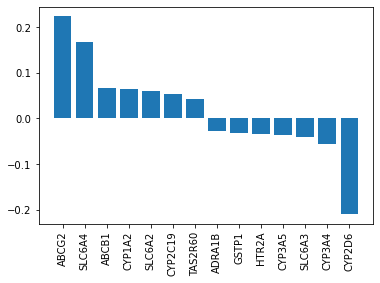

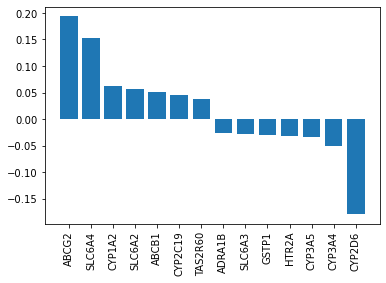

In [ ]:
## barplot of top 5 and bottom 5

# full model
eff_subset = pd.concat([eff_coef_full.head(7), eff_coef_full.tail(7)])

# barplot
plt.bar(x = eff_subset.gene, height = eff_subset.eff_coef_full)
plt.xticks(rotation = 90)
plt.show()


# regularized model
eff_ridge_filter = pd.concat([eff_ridge.head(7), eff_ridge.tail(7)])

# barplot
plt.bar(x = eff_ridge_filter.gene, height = eff_ridge_filter.coef_ridge)
plt.xticks(rotation = 90)
plt.show()

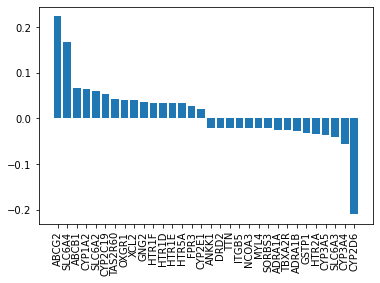

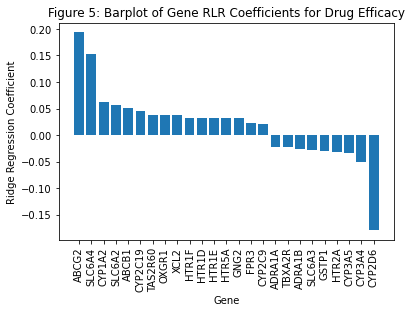

,gene,coef_ridge
250,ABCG2,0.193268
88,SLC6A4,0.152159
26,CYP1A2,0.063090
86,CYP2D6,-0.179099
87,CYP3A4,-0.051592
236,CYP3A5,-0.034161


In [ ]:
## barplot of varying gene amounts

# full model
eff_subset = eff_coef_full[(eff_coef_full['eff_coef_full'] > 0.02) | (eff_coef_full['eff_coef_full'] < -0.02)] # 33 genes
#len(eff_subset)

plt.bar(x = eff_subset.gene, height = eff_subset.eff_coef_full)
plt.xticks(rotation = 90)
plt.show()

# regularized model
#eff_ridge_filter = eff_ridge[(eff_ridge['coef_ridge'] > 0.005) | (eff_ridge['coef_ridge'] < -0.005)] # 105 genes
#eff_ridge_filter = eff_ridge[(eff_ridge['coef_ridge'] > 0.01) | (eff_ridge['coef_ridge'] < -0.01)] # 70 genes
eff_ridge_filter = eff_ridge[(eff_ridge['coef_ridge'] > 0.02) | (eff_ridge['coef_ridge'] < -0.02)] # 25 genes
len(eff_ridge_filter)

# create table of top 3 and bottom 3 genes and coefficients
eff_topbot_results = pd.concat([eff_ridge_filter.head(3),
                                eff_ridge_filter.tail(3).sort_values(by = 'coef_ridge', ascending = True)])
#eff_topbot_results.to_csv('results/efficacy_topbot_results.csv')

# barplot
plt.bar(x = eff_ridge_filter.gene, height = eff_ridge_filter.coef_ridge)
plt.title('Figure 5: Barplot of Gene RLR Coefficients for Drug Efficacy')
plt.xlabel('Gene')
plt.ylabel('Ridge Regression Coefficient')
plt.xticks(rotation = 90)
#plt.savefig('figures/efficacy_coef_barplot.png')
plt.show()

eff_topbot_results


Highest:

- ABCG2: belongs to a group of genes called the ATP-binding cassette family; genes in this family provide instructions for making proteins that transport molecules across cell membranes.

- SLC6A4: gene encodes an integral membrane protein that transports the neurotransmitter serotonin from synaptic spaces into presynaptic neurons. The encoded protein terminates the action of serotonin and recycles it in a sodium-dependent manner.

- CYP1A2: gene encodes a member of the cytochrome P450 superfamily of enzymes. The cytochrome P450 proteins are monooxygenases which catalyze many reactions involved in drug metabolism and synthesis of cholesterol, steroids and other lipids.

Lowest:

- CYP2D6: enzyme that catalyses the metabolism of a large number of clinically important drugs including antidepressants, neuroleptics, some antiarrhythmics, lipophilic β-adrenoceptor blockers and opioids.

- CYP3A4: gene encodes a member of the cytochrome P450 superfamily of enzymes. The cytochrome P450 proteins are monooxygenases that catalyze many reactions involved in drug metabolism and synthesis of cholesterol, steroids and other lipids. This enzyme is involved in the metabolism of approximately half the drugs in use today, including acetaminophen, codeine, cyclosporin A, diazepam, erythromycin, and chloroquine. The enzyme also metabolizes some steroids and carcinogens.

- CYP3A5: gene encodes a member of the cytochrome P450 superfamily of enzymes. The cytochrome P450 proteins are monooxygenases which catalyze many reactions involved in drug metabolism and synthesis of cholesterol, steroids and other lipids. The encoded protein metabolizes drugs as well as the steroid hormones testosterone and progesterone

### Acceptability

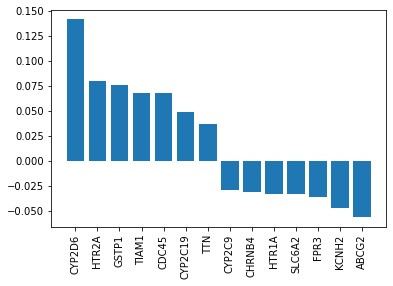

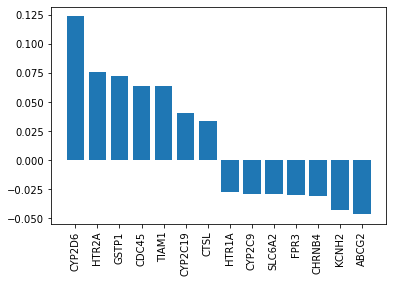

In [ ]:
## barplot of top 5 and bottom 5

# full model
acc_subset = pd.concat([acc_coef_full.head(7), acc_coef_full.tail(7)])

# barplot
plt.bar(x = acc_subset.gene, height = acc_subset.acc_coef_full)
plt.xticks(rotation = 90)
plt.show()

# regularized model
acc_ridge_filter = pd.concat([acc_ridge.head(7), acc_ridge.tail(7)])
#len(eff_ridge_filter)

# barplot
plt.bar(x = acc_ridge_filter.gene, height = acc_ridge_filter.coef_ridge)
plt.xticks(rotation = 90)
plt.show()

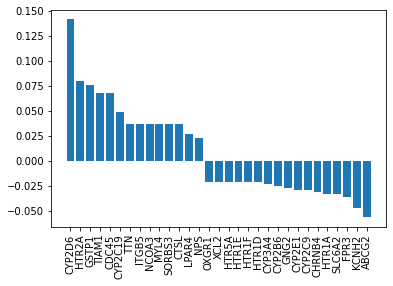

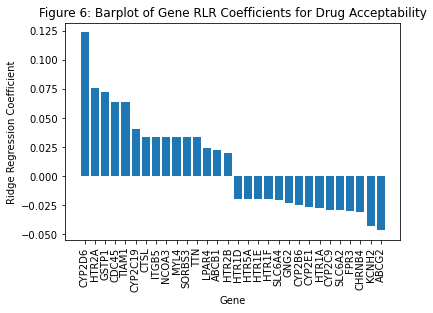

In [ ]:
## barplot of varying gene amounts

# full model
acc_subset = acc_coef_full[(acc_coef_full['acc_coef_full'] > 0.02) | (acc_coef_full['acc_coef_full'] < -0.02)] # 30 genes
#len(acc_subset)

# barplot
plt.bar(x = acc_subset.gene, height = acc_subset.acc_coef_full)
plt.xticks(rotation = 90)
plt.show()

# regularized model
#acc_ridge_filter = acc_ridge[(acc_ridge['coef_ridge'] > 0.005) | (acc_ridge['coef_ridge'] < -0.005)] # 105 genes
#acc_ridge_filter = acc_ridge[(acc_ridge['coef_ridge'] > 0.01) | (acc_ridge['coef_ridge'] < -0.01)] # 70 genes
acc_ridge_filter = acc_ridge[(acc_ridge['coef_ridge'] > 0.02) | (acc_ridge['coef_ridge'] < -0.02)] # 25 genes
#len(acc_ridge_filter)

# create table of top 3 and bottom 3 genes and coefficients
acc_topbot_results = pd.concat([acc_ridge_filter.head(3),
                                acc_ridge_filter.tail(3).sort_values(by = 'coef_ridge', ascending = True)])
#acc_topbot_results.to_csv('results/accept_topbot_results.csv')

# barplot
plt.bar(x = acc_ridge_filter.gene, height = acc_ridge_filter.coef_ridge)
plt.title('Figure 6: Barplot of Gene RLR Coefficients for Drug Acceptability')
plt.xlabel('Gene')
plt.ylabel('Ridge Regression Coefficient')
plt.xticks(rotation = 90)
#plt.savefig('figures/accept_coef_barplot.png')
plt.show()

#acc_topbot_results


Highest:

- CYP2D6: enzyme that catalyses the metabolism of a large number of clinically important drugs including antidepressants, neuroleptics, some antiarrhythmics, lipophilic β-adrenoceptor blockers and opioids.   

- HTR2A: gene encodes one of the receptors for serotonin, a neurotransmitter with many roles. Mutations in this gene are associated with susceptibility to schizophrenia and obsessive-compulsive disorder, and are also associated with response to the antidepressant citalopram in patients with major depressive disorder (MDD)

- GSTP1: isozyme encoded by the GST pi gene that plays an important regulatory role in detoxification, anti‑oxidative damage, and the occurrence of various diseases.

Lowest:

- ABCG2: belongs to a group of genes called the ATP-binding cassette family; genes in this family provide instructions for making proteins that transport molecules across cell membranes.

- KCNH2: belongs to a large family of genes that provide instructions for making potassium channels. These channels, which transport positively charged atoms (ions) of potassium out of cells, play key roles in a cell's ability to generate and transmit electrical signals.

- CHRNB4: gene is found within a conserved gene cluster and encodes one of the beta subunits of the nicotinic acetylcholine receptor (nAChRs) superfamily which form ligand-gated ion channels with a central pore that forms a cation channel


## Find which drugs are associated with which phenotypes

In [ ]:
## efficacy

# top three and bottom three efficacy coefficients with associated phenotypes and drugs
eff_drug_phen = pd.concat([antidepress.drug,
                           efficacy[['name', 'ABCG2', 'SLC6A4', 'CYP1A2', 'CYP2D6', 'CYP3A4', 'CYP3A5']]],
                      axis = 1)
eff_drug_phen

,drug,name,ABCG2,SLC6A4,CYP1A2,CYP2D6,CYP3A4,CYP3A5
0,agomelatine,DB06594,0.0,0.0,1.0,0.0,0.0,0.0
1,buproprion,DB01156,0.0,0.0,0.0,0.0,0.0,0.0
2,citalopram,DB00215,0.0,1.0,1.0,1.0,1.0,0.0
3,desvenlafaxine,DB06700,0.0,1.0,0.0,1.0,1.0,0.0
4,duloxetine,DB00476,0.0,1.0,1.0,1.0,0.0,0.0
5,escitalopram,DB01175,0.0,1.0,0.0,1.0,1.0,0.0
6,fluoxetine,DB00472,0.0,1.0,1.0,1.0,1.0,1.0
7,fluvoxamine,DB00176,0.0,1.0,1.0,1.0,1.0,0.0
8,levomilnacipran,DB08918,0.0,1.0,0.0,1.0,1.0,0.0
9,milnacipran,DB04896,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
## acceptability

# top three and bottom three efficacy coefficients with associated phenotypes and drugs
acc_drug_phen = pd.concat([antidepress.drug,
                           accept[['CYP2D6', 'HTR2A', 'GSTP1', 'ABCG2', 'KCNH2', 'CHRNB4']]],
                         axis = 1)
acc_drug_phen

,drug,CYP2D6,HTR2A,GSTP1,ABCG2,KCNH2,CHRNB4
0,agomelatine,0.0,0.0,0.0,0.0,0.0,0.0
1,buproprion,0.0,0.0,0.0,0.0,0.0,0.0
2,citalopram,1.0,0.0,0.0,0.0,0.0,0.0
3,desvenlafaxine,1.0,0.0,0.0,0.0,0.0,0.0
4,duloxetine,1.0,0.0,0.0,0.0,0.0,0.0
5,escitalopram,1.0,1.0,0.0,0.0,0.0,0.0
6,fluoxetine,1.0,0.0,0.0,0.0,1.0,1.0
7,fluvoxamine,1.0,0.0,0.0,0.0,1.0,0.0
8,levomilnacipran,1.0,0.0,0.0,0.0,0.0,0.0
9,milnacipran,0.0,0.0,0.0,0.0,0.0,0.0


### Create clustering plot

In [ ]:
# concatenate the dataframes
df = efficacy[efficacy.columns[2:326]]
df

,NPS,NPSR1,AVPR1B,GRP,GNRH2,CHRM1,GRM1,LPAR4,PROKR2,P2RY1,...,NTRK2,UGT1A4,DERL1,GPR132,NGF,SHC3,GSTP1,SLCO1B3,SLCO2B1,ABCB11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove string variables

df = df.loc[:,(df.sum() > 1)]
column_counts = df.sum(axis = 0)
df.shape

(21, 294)

In [ ]:
# create numpy array for use with scipy
#data = df.loc[:, (df.columns != 'Drug Bank ID')]
#print(data.head())
data = df.set_index(antidepress.drug)
data

,NPS,NPSR1,AVPR1B,GRP,GNRH2,CHRM1,GRM1,LPAR4,PROKR2,P2RY1,...,SCTR,IAPP,PTH2R,LHCGR,RXFP2,HTR1B,ADM,TBXA2R,TIAM1,ADRA1A
drug,,,,,,,,,,,,,,,,,,,,,
agomelatine,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
buproprion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
citalopram,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
desvenlafaxine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duloxetine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
escitalopram,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluoxetine,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fluvoxamine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
levomilnacipran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


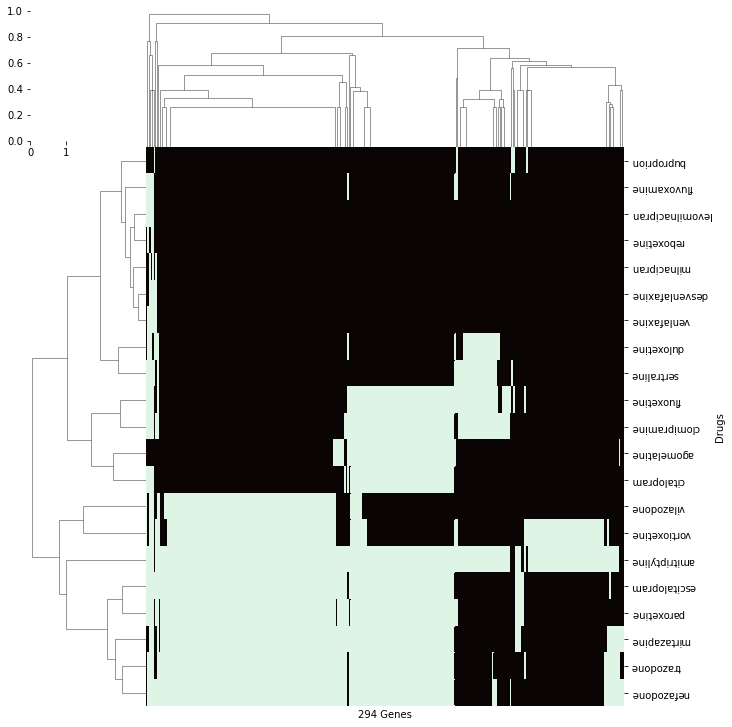

In [ ]:
# plot heat map
heatfig = sns.clustermap(data, cmap = "mako", yticklabels = True, xticklabels = False, cbar = None)
ax = heatfig.ax_heatmap
plt.setp(ax.yaxis.get_majorticklabels(), rotation = 180)
ax.set_xlabel('294 Genes')
ax.set_ylabel('Drugs')
plt.savefig('figures/all_drugs_clustermap.png', format = 'png')

### Check association tables

In [ ]:
desvenlafaxine = pd.read_csv('results/antidepressants/DB06700/DB06700_merged_neighborhood__assoc_table_.txt', sep = '\t')
desvenlafaxine.head()

,rank,phenotype,cui,assoc in neigh,assoc in intom,probability,Benjamini-Hochberg,genes,Unnamed: 8
0,52,"Pain, Postoperative",C0030201,3,27,0.000002,0.000061,"CYP2D6,CYP3A4,SLC6A4",NaN
1,80,Impulsive character (finding),C0564567,3,44,0.000013,0.000094,"SLC6A2,SLC6A3,SLC6A4",NaN
2,84,Tardive Dyskinesia,C0686347,3,50,0.000022,0.000099,"CYP2D6,CYP3A4,SLC6A3",NaN
3,85,Drug-induced tardive dyskinesia,C3714760,3,50,0.000022,0.000100,"CYP2D6,CYP3A4,SLC6A3",NaN
4,88,Drug usage,C0242510,3,51,0.000024,0.000104,"CYP2D6,SLC6A3,SLC6A4",NaN


In [ ]:
milnacipran = pd.read_csv('results/antidepressants/DB04896/DB04896_merged_neighborhood__assoc_table_.txt', sep = '\t')
milnacipran.head()

,rank,phenotype,cui,assoc in neigh,assoc in intom,probability,Benjamini-Hochberg,genes,Unnamed: 8
0,36,"Pain, Postoperative",C0030201,2,27,0.000003,0.000065,"CYP3A4,SLC6A4",NaN
1,58,Impulsive character (finding),C0564567,2,44,0.000013,0.000105,"SLC6A2,SLC6A4",NaN
2,79,Heroin Dependence,C0019337,2,67,0.000048,0.000143,"SLC6A2,SLC6A4",NaN
3,91,Withdrawal Symptoms,C0087169,2,72,0.000059,0.000165,"CYP3A4,SLC6A4",NaN
4,92,Panic disorder 1,C1868649,2,76,0.000070,0.000167,"SLC6A2,SLC6A4",NaN


In [ ]:
levomilnacipran = pd.read_csv('results/antidepressants/DB08918/DB08918_merged_neighborhood__assoc_table_.txt', sep = '\t')
levomilnacipran.head()

,rank,phenotype,cui,assoc in neigh,assoc in intom,probability,Benjamini-Hochberg,genes,Unnamed: 8
0,73,"Pain, Postoperative",C0030201,4,27,3.705070e-07,0.000060,"ABCB1,CYP2D6,CYP3A4,SLC6A4",NaN
1,76,Drug Resistant Epilepsy,C1096063,4,58,1.829748e-05,0.000063,"ABCB1,CYP2C19,CYP2D6,CYP3A4",NaN
